p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

adjuvant vs. MASPpepK: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.000e+00 U_stat=1.000e+00
adjuvant vs. NGP24h: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.000e+00 U_stat=1.000e+00
adjuvant vs. MASPpepK + NGP24h: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.000e+00 U_stat=0.000e+00


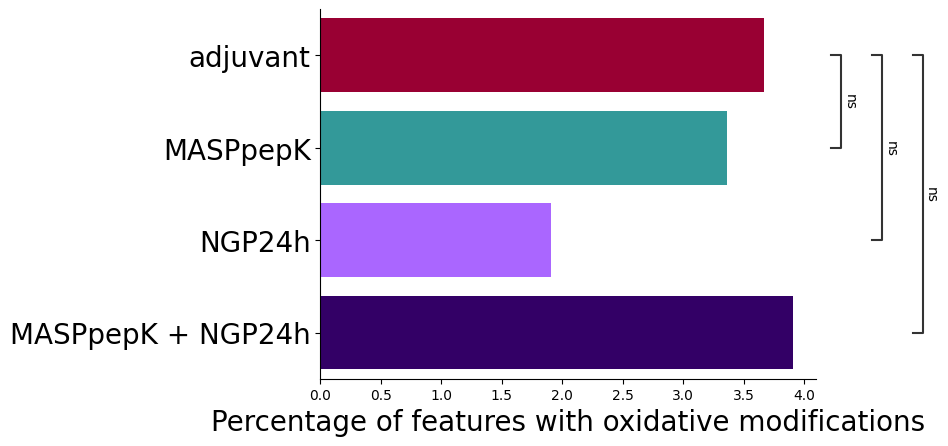

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator

# read data and subset data.
bar_data = pandas.read_csv('pos-org-barplot-data.csv')

order = ['adjuvant', 'MASPpepK', 'NGP24h', 'MASPpepK + NGP24h']

plt.rc('ytick',labelsize=20)

plot_1 = sns.barplot(y=bar_data['group_name'] , x=bar_data['percentage'], order = order)
annot_1 = Annotator(plot_1,[("adjuvant", "MASPpepK"),
                            ("adjuvant", "NGP24h"),
                            ("adjuvant", "MASPpepK + NGP24h")], y=bar_data['group_name'] , x=bar_data['percentage'], order=order, orient='h')
annot_1.configure(test='Mann-Whitney', comparisons_correction="BH", correction_format="replace", text_format='star', loc='outside', verbose=2)
annot_1.apply_test()
plot_1, test_results = annot_1.annotate()
plot_1.patches[0].set_facecolor('#990033')
plot_1.patches[1].set_facecolor('#339999')
plot_1.patches[2].set_facecolor('#AA66FF')
plot_1.patches[3].set_facecolor('#330066')
plot_1.spines['top'].set_visible(False)
plot_1.spines['right'].set_visible(False)
plot_1.set_title("")
plot_1.set_xlabel('Percentage of features with oxidative modifications', fontsize = 20)
plot_1.set_ylabel('')
plt.rc('ytick')
#plot_1.set_xlim([0, 0.5])
plt.savefig("pos_org_barplot.png", dpi=300, bbox_inches='tight')